In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt



In [2]:
from ShAReD_Net.configure import config

cam_transform = config.dataset.cam_transform
inverse_cam_transforme = config.dataset.inverse_cam_transforme


config.dataset.IMG_PATH = "/dataset/jta/images"
config.dataset.ANNO_PATH = "/dataset/jta/new_image_annotations"

config.checkpoint.path = "/tf/pose3D/checkpoints"
config.tensorboard.path = "/tf/pose3D/logdir"



In [3]:
#TODO TEST
print(tf.matmul(cam_transform, inverse_cam_transforme))

tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]], shape=(3, 3), dtype=float32)


In [4]:
data_split = "train"

In [5]:
cut_dist = 30

In [6]:
import ShAReD_Net.data.transform.transform as transform

In [7]:
img_poses_ds = config.dataset.create_dataset(data_split)

img_poses_poss_ds = transform.create_img_poses_poss_dataset(img_poses_ds)
imgcut_poses_poss_ds = transform.create_imgcut_poses_poss_dataset(img_poses_poss_ds, cut_dist)
imgcut_imgposes_imgposs_ds = transform.create_imgcut_imgposes_imgposs_dataset(imgcut_poses_poss_ds)
imgcut_cutposes_cutposs_ds = transform.create_imgcut_cutposes_cutposs_dataset(imgcut_imgposes_imgposs_ds, cut_dist)
filtered_cutposes_cutposs_ds = transform.create_filtered_cutposes_cutposs_dataset(imgcut_cutposes_cutposs_ds)
imgcut_cutposes_cutposs_heatmap_indices_ds = transform.create_imgcut_cutposes_cutposs_heatmap_indices_dataset(filtered_cutposes_cutposs_ds, cut_dist)
imgcut_cutposes_cutposs_heatmap_indices_weights_ds = transform.create_imgcut_cutposes_cutposs_heatmap_indices_weights_dataset(imgcut_cutposes_cutposs_heatmap_indices_ds)
imgcut_relposes_roiindices_heatmap_indices_weights_ds = transform.create_imgcut_relposes_roiindices_heatmap_indices_weights_dataset(imgcut_cutposes_cutposs_heatmap_indices_weights_ds, cut_dist)
imgcut_relposes_roiindices_heatmap_indices_weights_poseindexes_ds = transform.create_imgcut_relposes_roiindices_heatmap_indices_weights_poseindexes_dataset(imgcut_relposes_roiindices_heatmap_indices_weights_ds)
batchable_ds = transform.create_batchable_dataset(imgcut_relposes_roiindices_heatmap_indices_weights_poseindexes_ds)



In [8]:
cutdist_ds = transform.create_cutdist_dataset()
interleaved_multiscale_ds = transform.create_dataset(data_split, 2)

In [9]:
def show_img(image):
    print(tf.shape(image))

    plt.figure(figsize=(40,20))

    ax = plt.subplot(5,5,1)
    plt.imshow(image)
    plt.axis('off')


for img, (heatmap, weights), roi_indexes, (rel_pose, pose_indexes) in interleaved_multiscale_ds.take(40):
    show_img(img)
    

KeyboardInterrupt: 

In [ ]:
#TODO TEST CODE
#TEST
imgcut_cutposes_cutposs_ds_take = imgcut_cutposes_cutposs_ds.take(1)
img, poses_img, poss_img = tf.data.experimental.get_single_element(imgcut_cutposes_cutposs_ds_take)

def show_img_cut(image, poss, poses):
    print(tf.shape(image),tf.shape(poss),tf.shape(poses))

    plt.figure(figsize=(40,20))

    ax = plt.subplot(5,5,1)
    plt.imshow(image)
    for pose in poses:
        for joint in pose:
            text = f"[{joint[0]},{joint[1]}]"
            print(text)
            plt.text(joint[0],joint[1], text)
    plt.axis('off')

    ax = plt.subplot(5,5,2)
    plt.imshow(image)
    for pos in poss:
        text = f"[{pos[0]},{pos[1]}]"
        print(text)
        plt.text(pos[0],pos[1], text)
    plt.axis('off')

show_img_cut(img, poss_img, poses_img)

In [ ]:
#TODO TEST CODE
#TEST

def show_img_and_hm(image, heatmap):
    print(tf.shape(image),tf.shape(poss),tf.shape(poses))

    plt.figure(figsize=(40,20))

    ax = plt.subplot(5,5,1)
    plt.imshow(image)
    for pos in poss:
        plt.text(pos[0],pos[1], "X")
    plt.axis('off')

    ax = plt.subplot(5,5,2)
    plt.imshow(heatmap[:,:,0], cmap="hot", interpolation="bicubic")
    plt.axis('off')

    ax = plt.subplot(5,5,3)
    plt.imshow(heatmap[:,:,1], cmap="hot", interpolation="bicubic")
    plt.axis('off')

for i in range(2):
    imgcut_cutposes_cutposs_heatmap_ds_take = imgcut_cutposes_cutposs_heatmap_indices_ds.take(1)
    img, poses, poss, heatmap, indix = tf.data.experimental.get_single_element(imgcut_cutposes_cutposs_heatmap_ds_take)
    show_img_and_hm(img, heatmap)

In [ ]:
#TODO TEST CODE
#TEST

def show_img_and_hm_w(image, heatmap, weights):
    print(tf.shape(image),tf.shape(poss),tf.shape(poses))

    plt.figure(figsize=(20,20))

    ax = plt.subplot(3,2,1)
    plt.imshow(image)
    for pos in poss:
        plt.text(pos[0],pos[1], "X")
    plt.title('Image')
    plt.axis('off')

    ax = plt.subplot(3,2,3)
    plt.imshow(weights[:,:,0], cmap="hot", interpolation="bicubic", clim=(0.0, 1.0))
    plt.title('Neg Weights')
    plt.axis('off')

    ax = plt.subplot(3,2,4)
    plt.title('Neg Heatmap')
    plt.imshow(heatmap[:,:,0], cmap="hot", interpolation="bicubic", clim=(0.0, 1.0))
    plt.axis('off')

    ax = plt.subplot(3,2,5)
    plt.title('Pos Weights')
    plt.imshow(weights[:,:,1], cmap="hot", interpolation="bicubic", clim=(0.0, 1.0))
    plt.axis('off')

    ax = plt.subplot(3,2,6)
    plt.title('Pos Heatmap')
    plt.imshow(heatmap[:,:,1], cmap="hot", interpolation="bicubic", clim=(0.0, 1.0))
    plt.axis('off')

imgcut_cutposes_cutposs_heatmap_weights_ds_take = imgcut_cutposes_cutposs_heatmap_indices_weights_ds.take(1)
img, poses, poss, heatmap, index, weights = tf.data.experimental.get_single_element(imgcut_cutposes_cutposs_heatmap_weights_ds_take)
show_img_and_hm_w(img, heatmap, weights)

In [ ]:
def show_img_and_hm_w(images, relposes):
    plt.figure(figsize=(20,20))
    for i, (pose_imge, img_pose) in enumerate(zip(images,relposes)):
        ax = plt.subplot(4,4,i+1)
        plt.imshow(pose_imge)
        for joint in img_pose:
            text = f"[{joint[0]},{joint[1]}]"
            print(text)
            plt.text(joint[0],joint[1], text)
        plt.axis('off')

imgcut_relposes_roiindices_heatmap_indices_weights_ds_take = imgcut_relposes_roiindices_heatmap_indices_weights_ds.take(1)
imgcut, relposes, roiindices, heatmap, indices, weights = tf.data.experimental.get_single_element(imgcut_relposes_roiindices_heatmap_indices_weights_ds_take)

import ShAReD_Net.model.modules.slim as slim_modules

roi_size = np.asarray(config.model.roi_size) * config.model.img_downsampling + 1
        
roi_extractor = slim_modules.Roi_Extractor(roi_size=roi_size)
roiindices_img = roiindices * config.model.img_downsampling
new_indexes = np.empty([roiindices_img.shape[0], roiindices_img.shape[1]+1], dtype=np.int32)
new_indexes[:,1:] = roiindices_img
new_indexes[:,0] = 0


imgcut_batched = imgcut[None,...]
pose_imges = roi_extractor([imgcut_batched, new_indexes])
print(pose_imges.shape)

img_poses = relposes[:,:,:-1] + roi_size/2

show_img_and_hm_w(pose_imges, img_poses)

Roi_Extractor [TensorShape([1, 1119, 1989, 3]), TensorShape([3, 3])]
(3, 87, 87, 3)
[48,22]
[48,26]
[46,48]
[38,26]
[56,28]
[36,32]
[58,40]
[32,42]
[54,46]
[42,50]
[48,50]
[40,66]
[48,62]
[40,84]
[46,72]
[42,18]
[44,22]
[42,44]
[34,24]
[52,24]
[30,30]
[56,36]
[28,40]
[52,42]
[38,46]
[46,46]
[40,64]
[46,60]
[40,80]
[44,64]
[42,12]
[42,18]
[42,42]
[50,22]
[32,20]
[52,34]
[30,32]
[54,44]
[30,40]
[46,44]
[38,44]
[46,58]
[38,60]
[44,76]
[38,74]


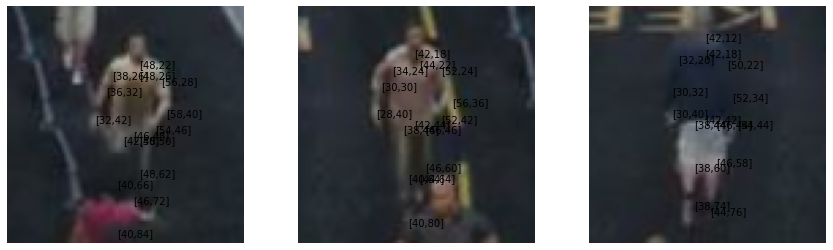

In [13]:
def show_img_and_hm_w(images, relposes):
    plt.figure(figsize=(20,20))
    for i, (pose_imge, img_pose) in enumerate(zip(images,relposes)):
        ax = plt.subplot(4,4,i+1)
        plt.imshow(pose_imge)
        for joint in img_pose:
            text = f"[{joint[0]},{joint[1]}]"
            print(text)
            plt.text(joint[0],joint[1], text)
        plt.axis('off')

imgcut_relposes_roiindices_heatmap_indices_weights_poseindexes_ds_ds_take = imgcut_relposes_roiindices_heatmap_indices_weights_poseindexes_ds.take(1)
imgcut, relposes, roiindices, heatmap, indices, weights, pose_indexes = tf.data.experimental.get_single_element(imgcut_relposes_roiindices_heatmap_indices_weights_poseindexes_ds_ds_take)

import ShAReD_Net.model.modules.slim as slim_modules

roi_size = np.asarray(config.model.roi_size) * config.model.img_downsampling + 1
        
roi_extractor = slim_modules.Roi_Extractor(roi_size=roi_size)
roiindices_img = roiindices * config.model.img_downsampling
new_indexes = np.empty([roiindices_img.shape[0], roiindices_img.shape[1]+1], dtype=np.int32)
new_indexes[:,1:] = roiindices_img
new_indexes[:,0] = 0


imgcut_batched = imgcut[None,...]
pose_imges = roi_extractor([imgcut_batched, new_indexes])
print(pose_imges.shape)

pose_indexes = pose_indexes[...,::-1] * config.model.img_downsampling

show_img_and_hm_w(pose_imges, pose_indexes)

In [14]:
imgcut_relposes_roiindices_heatmap_indices_weights_ds_take = imgcut_relposes_roiindices_heatmap_indices_weights_ds.take(1)
imgcut, relposes, roiindices, heatmap, indices, weights = tf.data.experimental.get_single_element(imgcut_relposes_roiindices_heatmap_indices_weights_ds_take)

pose_arr = tf.TensorArray(size=0,dtype=tf.float32,dynamic_size=True)
i = 0
for imgcut, relposes, roiindices, heatmap, indices, weights in imgcut_relposes_roiindices_heatmap_indices_weights_ds.take(1000):
    for img_pose in relposes:
        for joint in img_pose:
            pose_arr = pose_arr.write(i,joint)
            i+=1
            
agg_poses = pose_arr.stack()

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 3351, in run_code
    return outflag  File "<ipython-input-11-17513f8895d5>", line 6, in <module>
    for imgcut, relposes, roiindices, heatmap, indices, weights in imgcut_relposes_roiindices_heatmap_indices_weights_ds.take(1000):  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/util/tf_should_use.py", line 237, in wrapped
    error_in_function=error_in_function)


KeyboardInterrupt: 

In [ ]:
ax = plt.subplot(1,3,1)
plt.hist(agg_poses[:500,0])
ax = plt.subplot(1,3,2)
plt.hist(agg_poses[:500,1])
ax = plt.subplot(1,3,3)
plt.hist(agg_poses[:500,2])

In [ ]:
meanp = tf.reduce_mean(tf.abs(agg_poses),axis=[0])
print(meanp)
maxp = tf.reduce_max(agg_poses,axis=[0])
print(maxp)
minp = tf.reduce_min(agg_poses,axis=[0])
print(minp)

In [ ]:
import ShAReD_Net.data.transform.inverse_transform as inverse_transform

uncut_ds = inverse_transform.create_uncut_dataset(imgcut_cutposes_cutposs_ds)

In [ ]:
#TODO TEST test if uncut_ds == cam_ds
take_uncut = uncut_ds.take(1)
img, poss, poses = tf.data.experimental.get_single_element(take_uncut)

# image poss, poses and uncut poss, poses should have matching entrys (some are filtered out)


In [ ]:
real_ds1 = inverse_transform.create_uncut_dataset(imgcut_cutposes_cutposs_ds)
real_ds2 = inverse_transform.create_uncut_dataset(uncut_ds)

In [ ]:
#TODO TEST test if uncut_ds == cam_ds
take_real = real_ds1.take(1)
img, poss, poses = tf.data.experimental.get_single_element(take_real)

# image poss, poses and uncut poss, poses should have matching entrys (some are filtered out)

In [ ]:
#TODO TEST test if uncut_ds == cam_ds
take_real = real_ds2.take(1)
img, poss, poses = tf.data.experimental.get_single_element(take_real)

# image poss, poses and uncut poss, poses should have matching entrys (some are filtered out)

In [ ]:
#before augmentation
cache(filename='')
repeat(-1)
shuffle(100)


#batch
batch(8)

#before input
prefetch(20)

take(steps)

